# Blue Book for Bulldozers
> Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.

- toc: true 
- badges: true
- comments: true
- categories: [ml]
- keywords: [ml]

# About
This notebook explores and builts model for a bulldozer auction prices dataset from [Kaggle competition](https://www.kaggle.com/c/bluebook-for-bulldozers).

## Environment Details

In [1]:
#collapse-hide
from platform import python_version
import sklearn, numpy, matplotlib, pandas

print("python==" + python_version())
print("sklearn==" + sklearn.__version__)
print("numpy==" + numpy.__version__)
print("pandas==" + pandas.__version__)
print("matplotlib==" + matplotlib.__version__)

python==3.8.8
sklearn==1.0.2
numpy==1.20.1
pandas==1.2.3
matplotlib==3.5.1


In [2]:
##
# Notebook settings
import pandas as pd

pd.set_option('display.max_columns', None)

## Prepare the dataset

### Download the dataset files
* Train.zip and extract `Train.csv`. This is our training dataset.
* `Valid.csv`. This is our validation dataset.
* `Test.csv`. This is our test dataset.

### Take an initial look at the training data
Load the training data and look for the following information
* column names
* column data types
* how much data is missing?
* sample data elements

In [3]:
##
# load the training dataset
dataset_path = 'datasets/2022-04-35-bluebook-for-bulldozers/'

df_raw = pd.read_csv(dataset_path+'Train.csv', low_memory=False)
df = df_raw.copy()

In [4]:
##
# print training dataset summary information
df_info = pd.DataFrame()
df_info['sample'] = df.iloc[0]
df_info['data_type'] = df.dtypes
df_info['percent_missing'] = 100*df.isnull().sum() / len(df)
df_info.sort_values('percent_missing')

,sample,data_type,percent_missing
SalesID,1139246,int64,0.000000
state,Alabama,object,0.000000
fiProductClassDesc,Wheel Loader - 110.0 to 120.0 Horsepower,object,0.000000
fiBaseModel,521,object,0.000000
fiModelDesc,521D,object,0.000000
ProductGroup,WL,object,0.000000
saledate,11/16/2006 0:00,object,0.000000
datasource,121,int64,0.000000
ModelID,3157,int64,0.000000
MachineID,999089,int64,0.000000


In [5]:
##
# print some unique values against each feature
def sniff(df, rows=7):
    """
    For each column return a set of unique value
    """
    data = {}
    for col in df.columns:
        data[col] = df[col].unique()[:rows]
    
    return pd.DataFrame.from_dict(data, orient='index').T


In [6]:
sniff(df)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,132,1.0,1996,4640.0,High,3/26/2004 0:00,950FII,950,F,II,LC,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,SSL,Skid Steer Loaders,Four Wheel Drive,OROPS,NaN,None or Unspecified,NaN,Extended,Powershuttle,None or Unspecified,Yes,None or Unspecified,None or Unspecified,No,Auxiliary,None or Unspecified,None or Unspecified,Yes,Sideshift & Tip,23.5,NaN,None or Unspecified,None or Unspecified,Standard,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,NaN,NaN
2,1139249,10000,434808,7009,136,2.0,2001,2838.0,Medium,2/26/2004 0:00,226,226,NaN,-6E,6,Small,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,TEX,Track Excavators,Two Wheel Drive,EROPS,Yes,Reversible,No,Standard,Standard,Yes,None or Unspecified,12',Low Profile,Variable,NaN,Yes,Yes,None or Unspecified,None or Unspecified,NaN,Manual,Yes,Yes,High Flow,Rubber,16 inch,"11' 0""",Hydraulic,Yes,Triple,Yes,None or Unspecified,Differential Steer,Limited Slip,Command Control
3,1139251,38500,1026470,332,149,11.0,2007,3486.0,NaN,5/19/2011 0:00,PC120-6E,PC120,G,LC,L,Large / Medium,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,BL,Backhoe Loaders,No,NaN,None,Street,Yes,None,Powershift,None,None,14',High Profile,None,Standard,None,Single Shank,None,Tip,"13""",Hydraulic,None,None,None or Unspecified,None,32 inch,"15' 9""",Manual,No,Single,None,Semi U,Lever,No Spin,Four Wheel Standard
4,1139253,11000,1057373,17311,172,4.0,1993,722.0,None,7/23/2009 0:00,S175,S175,E,-5,LT,Mini,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,Arizona,TTT,Track Type Tractors,All Wheel Drive,EROPS AC,None,Grouser,None,None,None or Unspecified,None,None,13',None,None,Base + 1 Function,None,Multi Shank,None,None,26.5,None,None,None,None,None,28 inch,"10' 2""",None,None,None,None,VPAT,Finger Tip,Locking,Wheel
5,1139255,26500,1001274,4605,None,7.0,2008,508.0,None,12/18/2008 0:00,310G,310,HAG,III,CR,Large,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,MG,Motor Graders,None,NO ROPS,None,None,None,None,Hydrostatic,None,None,16',None,None,Base + 3 Function,None,None,None,None,29.5,None,None,None,None,None,30 inch,"10' 6""",None,None,None,None,Straight,2 Pedal,None,No
6,1139256,21000,772701,1937,None,99.0,1000,11540.0,None,8/26/2004 0:00,790ELC,790,B,-1,SB,Compact,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",Illinois,None,None,None,None or Unspecified,None,None,None,None,Autoshift,None,None,<12',None,None,4 Valve,None,None,None,None,"14""",None,None,None,None,None,22 inch,"9' 10""",None,None,None,None,Angle,Pedal,None,None


From this first look at the data, we can see that
* data is of three types
  * numeric
  * string
  * datetime
* some columns have missing data up to 94% e.g. `Tip_Control`
* missing data is represented as
  * NaN
  * None or unspecified
* some columns' data types need to be corrected for example
  * `SaleID`, `MachineID` are represented as integers but they are categorical nominal features meaning each value is discrete and has no relation among them
  * `UsageBand` is of type string but is a categorical ordinal feature meaning their values cannot be measured but have some order between them
  * `Tire_size`, `Stick_length` are actual measurements and need to be converted to appropriate units

## Baseline Model

It is a good idea to create a baseline model early in the data science project as it can help to establish a baseline for
* time it takes to train a model
  * if the baseline model is taking too much time then we may use a smaller set of the training data for further steps
* feature importances
  * it can help us establish a relationship between features and the target
  * help us remove features that have no relationship with the target sooner
* model performance
  * we can take this model performance as a baseline, and compare it to see how much cleanup and feature engineering steps improve the model performance

For the baseline model, we would have to rely on numerical features as they don't require any preprocessing and can be readily used. Some numerical features have too much missing data so we have to be selective here.

In [7]:
##
# filter columns that are not string along with their percentage of missing data
numerical_features = df_info.loc[df_info.data_type != 'object'].sort_values('percent_missing')
numerical_features

,sample,data_type,percent_missing
SalesID,1139246,int64,0.000000
SalePrice,66000,int64,0.000000
MachineID,999089,int64,0.000000
ModelID,3157,int64,0.000000
datasource,121,int64,0.000000
YearMade,2004,int64,0.000000
auctioneerID,3.0,float64,5.019882
MachineHoursCurrentMeter,68.0,float64,64.408850


From these numerical features `MachineHoursCurrentMeter` has around 64% missing data. Let's keep this feature as well for our baseline model.

In [8]:
##
# establish target and baseline features
target = 'SalePrice' # this is the feature we are trying to predict
baseline_features = list(numerical_features.index)
baseline_features.remove(target) # remove target feature form input variables
baseline_features

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'YearMade',
 'auctioneerID',
 'MachineHoursCurrentMeter']

We have established our target and features, and can now train our baseline model. We will use only `RandomForrest` for this dataset.

In [9]:
#collapse-output
from sklearn.ensemble import RandomForestRegressor

X, y = df[baseline_features], df[target]
X = X.fillna(0) # replace missing numerical values with 0

rf = RandomForestRegressor(n_estimators=5, oob_score=True, n_jobs=-1, verbose=2)
rf.fit(X, y)
oob_score = rf.oob_score_
oob_score

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 5building tree 2 of 5building tree 3 of 5
building tree 4 of 5


building tree 5 of 5


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.8s finished
C:\Users\HP\anaconda3\envs\sc_mlflow\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


0.4317100232840214

Besides the OOB score, we can also interpret our model by looking into the trained model trees' depth and leaves. If OOB score is same but our trees are smaller with fewer nodes then that model is better and more generalized. Larger trees make the model more complex and less generalized. For this let's create two more functions.

In [10]:
import numpy as np

def rf_n_leaves(rf):
    """
    return the total number of nodes in all the trees of the forrest.
    """
    return sum(est.tree_.n_leaves for est in rf.estimators_)

def rf_m_depth(rf):
    """
    return a median height of all the trees of the forrest.
    """
    return np.median([est.tree_.max_depth for est in rf.estimators_])

In [11]:
##
# print model oob_score, number of forrest leaves and median height
n_leaves = rf_n_leaves(rf)
m_depth = rf_m_depth(rf)

print(f"OOB scrore = {oob_score: .3f} \nTree leaves = {n_leaves: ,d} \nMedian depth = {m_depth}")

OOB scrore =  0.432 
Tree leaves =  1,158,584 
Median depth = 53.0


Our baseline model has an OOB score of just around 79% which is not bad as a starter. Now let's also plot the feature importance for this model.

In [12]:
def plot_feature_importance(feature_importance, feature_names, figsize=(7,7)):
    """
    plot the feature importances in a bar graph along with feature names.
    """
    fimp = pd.Series(feature_importance, feature_names)
    fimp.nlargest(len(fimp)).plot(figsize=figsize, kind='barh').invert_yaxis()

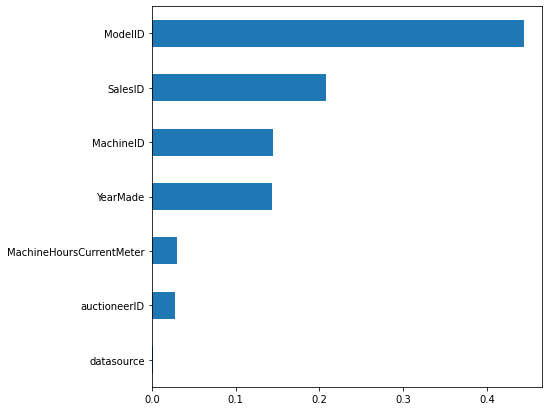

In [13]:
feature_importance = rf.feature_importances_
feature_names = X.columns
plot_feature_importance(feature_importance, feature_names)

From this feature importance plot, we can see that
* `ModelID` is the highest predictor of `SalePrice` which makes sense
* `SalesID` and `MachineID` are coming up next as important features. This is not a good signal as both these features are unique for sale transactions and machine identification. `MachineID` also has inconsistencies as noted in this [kaggle discussion](https://www.kaggle.com/c/bluebook-for-bulldozers/discussion/3694).  A model using these features will not be generalized. It would be better if we remove these features altogether otherwise they can affect the model's performance.
* `YearMade` comes next which also makes sense as older vehicles will have less price compared to the new ones.

## Cleaning up

In this section we will remove unimportanct features and fix the data types of remaining features.

### Remove ID columns

As noted in last section we noted that following ID features can be removed from the dataset.
* SalesID
* MachineID

In [14]:
del df['SalesID']
del df['MachineID']

## Fix data types and data issues
Let's visit each feature from our dataset and check whether we need to fix the data type. Use `df_info` created in the last section to verify the data types of each feature.

### Numerical features
Let's first visit the numerical feature.

#### auctioneerID
It has the datatype as `float64` but this feature is actually categorical nominal as each ID is dicreate and has no relation between them. So let's fix its datatype.

In [15]:
df['auctioneerID'] = df['auctioneerID'].astype(str)

### Datetime feature
Let's visit datetime features and correct their datatype
#### saledate
'saledate' is a datetime feature. So let's correct its datatype.

In [16]:
df['saledate'] = pd.to_datetime(df['saledate'])

### Categorical features

Let's now visit the categorical features.

For categorical features there is no better way than printing the unique values for each column and spend some time analyzing the values. Check 
* if the feature has some missing values
* if there are any missing values but are represented by some other value like 'Unspecified', 'None or Unspecified'
* keep a separate sheet with all the feature and make notes for each feature like
  * there are no further actions required. feature is good for use
  * need to replace missing values
  * any other observations 
  * etc.

#### Transform missing values

After visiting all the feature we have found that missing values are represented in multiple ways like
* Unspecified
* None or Unspecified
* None
* #NAME?
* ""

So we would transform and replace all these values with `np.nan` so they all represent the same thing.

In [17]:
##
# before transformation. 
# let's use this feature to verify results.
df['Hydraulics'].unique()

array(['2 Valve', 'Auxiliary', nan, 'Standard', 'Base + 1 Function',
       'Base + 3 Function', '4 Valve', '3 Valve', 'Base + 2 Function',
       'Base + 4 Function', 'None or Unspecified', 'Base + 5 Function',
       'Base + 6 Function'], dtype=object)

In [18]:
def normalize_str_values(df):
    """
    normalize dataframe str values
    * transform case to lowercase
    * replace missing values with np.nan
    """
    for col in df.columns:
        if df[col].dtype == object: 
            df[col] = df[col].str.lower()
            df[col] = df[col].fillna(np.nan)
            df[col] = df[col].replace('unspecified', np.nan)
            df[col] = df[col].replace('none or unspecified', np.nan)
            df[col] = df[col].replace('none', np.nan)
            df[col] = df[col].replace('#name?', np.nan)
            df[col] = df[col].replace('', np.nan)

normalize_str_values(df)

In [19]:
##
# after transformation. 
# remember that transformation is applied to all string type columns
df['Hydraulics'].unique()

array(['2 valve', 'auxiliary', nan, 'standard', 'base + 1 function',
       'base + 3 function', '4 valve', '3 valve', 'base + 2 function',
       'base + 4 function', 'base + 5 function', 'base + 6 function'],
      dtype=object)

#### Transform measurements

Some features are represented as a string but actually they are numerical measurement values. For example
* `Tire_Size` has the size in inches with a symbol attached `"`
* `Undercarriage_Pad_Width` has the size in inches with the unit attached `inch`
* `Blade_Width` has the size in cm with a symbol attached `'`. It also has values less the 12cm represented as `<12'`
* `Stick_Length` has values in both feet and inches. We can simply convert them from `19\'8"` to 19.8
* After the above transformations, their data types should be converted to numeric

let's apply these changes to our dataset.

In [20]:
##
# before transformation
for col in ['Tire_Size', 'Undercarriage_Pad_Width', 'Blade_Width', 'Stick_Length']:
    print(f"**{col}**: ", df[col].unique())

**Tire_Size**:  [nan '23.5' '13"' '26.5' '29.5' '14"' '20.5' '17.5"' '15.5"' '20.5"'
 '17.5' '7.0"' '15.5' '23.5"' '10"' '23.1"' '10 inch']
**Undercarriage_Pad_Width**:  [nan '16 inch' '32 inch' '28 inch' '30 inch' '22 inch' '24 inch' '18 inch'
 '36 inch' '20 inch' '27 inch' '15 inch' '26 inch' '34 inch' '33 inch'
 '14 inch' '31 inch' '25 inch' '31.5 inch']
**Blade_Width**:  [nan "12'" "14'" "13'" "16'" "<12'"]
**Stick_Length**:  [nan '11\' 0"' '15\' 9"' '10\' 2"' '10\' 6"' '9\' 10"' '10\' 10"' '9\' 6"'
 '9\' 7"' '12\' 8"' '8\' 2"' '8\' 6"' '9\' 8"' '12\' 10"' '11\' 10"'
 '8\' 10"' '8\' 4"' '12\' 4"' '9\' 5"' '6\' 3"' '14\' 1"' '13\' 7"'
 '13\' 10"' '13\' 9"' '7\' 10"' '15\' 4"' '9\' 2"' '24\' 3"' '19\' 8"']


In [21]:
df['Stick_Length'] = df['Stick_Length'].replace(r"' ", ".", regex=True)
for col in ['Tire_Size', 'Undercarriage_Pad_Width', 'Blade_Width', 'Stick_Length']:
    df[col] = df[col].str.extract(r'([0-9.]*)', expand=True)
    df[col] = df[col].replace('', np.nan)
    df[col] = pd.to_numeric(df[col])

In [22]:
##
# after transformation
for col in ['Tire_Size', 'Undercarriage_Pad_Width', 'Blade_Width', 'Stick_Length']:
    print(f"**{col}**: ", df[col].unique())

**Tire_Size**:  [ nan 23.5 13.  26.5 29.5 14.  20.5 17.5 15.5  7.  10.  23.1]
**Undercarriage_Pad_Width**:  [ nan 16.  32.  28.  30.  22.  24.  18.  36.  20.  27.  15.  26.  34.
 33.  14.  31.  25.  31.5]
**Blade_Width**:  [nan 12. 14. 13. 16.]
**Stick_Length**:  [ nan 11.  15.9 10.2 10.6  9.1 10.1  9.6  9.7 12.8  8.2  8.6  9.8 12.1
 11.1  8.1  8.4 12.4  9.5  6.3 14.1 13.7 13.1 13.9  7.1 15.4  9.2 24.3
 19.8]


## Dealing with missing data

### Replace missing numeric values
For numerical features, we will follow the following approach to replace missing values
* For a column `x` create a new column `x_na` where `x_na[i]` is marked as True if `x[i]` is missing
* Replace the missing values in the x column with a median value

In [23]:
def fix_missing_num(df, colname):
    """
    replace missing values with
    * median value
    * flag the missing value in a separate *_na column
    """
    df[colname+'_na'] = pd.isnull(df[colname])
    df[colname].fillna(df[colname].median(), inplace=True)

#### YearMade

"YearMade" doesn't show any missing values but if we look closely at the data we will find that some instances have the value "1000". The year 1000 is very unlikely for any vehicle to be made in and we can consider these instances as missing values. Let's do that

<AxesSubplot:xlabel='YearMade', ylabel='SalePrice'>

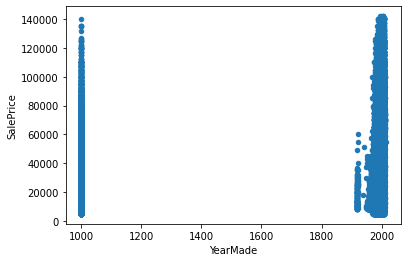

In [24]:
##
# befor transformation
df.plot.scatter('YearMade', 'SalePrice')

In [25]:
df.loc[df.YearMade==1000, 'YearMade'] = np.nan

<AxesSubplot:xlabel='YearMade', ylabel='SalePrice'>

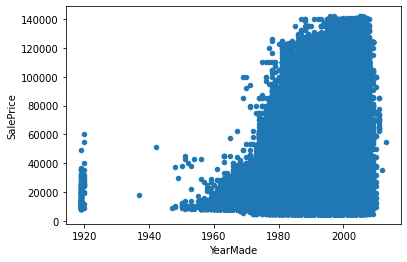

In [26]:
##
# after transformation
df.plot.scatter('YearMade', 'SalePrice')

The plot now shows a more clear relationship between 'YearMade' and 'SalePrice'. But the spike in the year 1920 is still concerning. Most probably it is also a recording error when the manufacturing year was not known then it was assigned some lowest available value in the system (similar to the year 1000). Let's take this assumption that manufacturing years before 1950 are unknown and should be assigned `np.nan`

In [27]:
df.loc[df.YearMade<1950, 'YearMade'] = np.nan

<AxesSubplot:xlabel='YearMade', ylabel='SalePrice'>

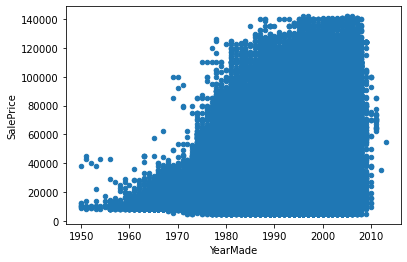

In [28]:
##
# after transformation
df.plot.scatter('YearMade', 'SalePrice')

Let's also replace the missing values with the function created above.

In [29]:
fix_missing_num(df, 'YearMade')

#### MachineHoursCurrentMeter

The next numerical feature that comes is `MachineHoursCurrentMeter`. This feature tells us the number of hours a machine has been in use when it was brought to the auction. So older machines are much more likely to have more hours on them as compared to newer machines. There should be a correlation between machine hours and the vehicle in use period (a period between manufacturing and auction). To verify this relationship we first need to find the period in years between manufacturing and auction. We have the 'YearMade' that tells us when the vehicle was made. We have the 'saledate' which is a DateTime string object but we can use it to find the 'YearSold'.

In [30]:
df['YearSold'] = df['saledate'].dt.year

In [31]:
##
# verify that we have correct data
df[['saledate', 'YearSold']].head()

,saledate,YearSold
0,2006-11-16,2006
1,2004-03-26,2004
2,2004-02-26,2004
3,2011-05-19,2011
4,2009-07-23,2009


Now we can use 'YearMade' and 'YearSold' to find the number of years the vehicle remained in use. Let's call this new column 'YearsInUse'

In [32]:
df['YearsInUse'] = df['YearSold'] - df['YearMade']

In [33]:
##
# verify the results
df[['YearsInUse', 'YearSold', 'YearMade']].head()

,YearsInUse,YearSold,YearMade
0,2.0,2006,2004.0
1,8.0,2004,1996.0
2,3.0,2004,2001.0
3,10.0,2011,2001.0
4,2.0,2009,2007.0


A sold year cannot be less than a manufacturing year. So let's verify data integrity as well.

In [34]:
df.loc[df.YearsInUse<0, ['YearsInUse', 'saledate', 'YearSold', 'YearMade']].head()

,YearsInUse,saledate,YearSold,YearMade
24007,-2.0,1994-02-11,1994,1996.0
24009,-1.0,1995-04-18,1995,1996.0
24015,-2.0,1994-09-20,1994,1996.0
24029,-1.0,1995-04-28,1995,1996.0
24064,-1.0,1995-04-28,1995,1996.0


YearInUse cannot have a negative value and this shows that either 'YearMade' or 'saledate' is incorrect. We can assume that error can be with 'YearMade' as this is an auction dataset and 'saledate' is be more reliable. For entries where 'YearMade' is greater than 'YearSold' we can replace 'YearMade' with 'YearSold'.

In [35]:
df.loc[df.YearMade>df.YearSold, 'YearMade'] = df.YearSold

Let's recalculate the 'YearsInUse' with corrected data.

In [36]:
df['YearsInUse'] = df['YearSold'] - df['YearMade']

Let's verify that the data is consistent and all vehicles have 'YearMade' less than their 'YearSold'

In [37]:
df.loc[df.YearsInUse<0, ['YearsInUse', 'saledate', 'YearSold', 'YearMade']].head()

,YearsInUse,saledate,YearSold,YearMade


We can now plot the relationship between 'YearsInUse' and 'MachineHoursCurrentMeter'

<AxesSubplot:xlabel='YearsInUse', ylabel='MachineHoursCurrentMeter'>

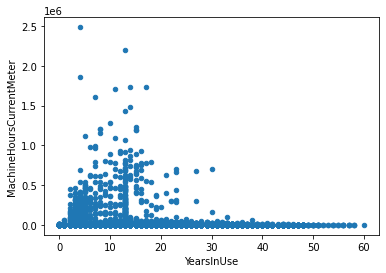

In [38]:
df.plot.scatter('YearsInUse', 'MachineHoursCurrentMeter')

This plot shows that there is some relation between a vehicle being in use and its meter hours but it is also showing that meter hours have inconsistencies. Many vehicles remained in use for multiple years but they have zero meter readings. This is very unrealistic and vehicles will not be sitting idle for many years till their auction. It could be that the meter reading for them was not known and 0 could have been used for 'Unspecified or Unknown' value. Let's take this assumption and transform 'MachineHoursCurrentMeter' to correctly represent that

In [39]:
df.loc[df.MachineHoursCurrentMeter==0, 'MachineHoursCurrentMeter'] = np.nan

Also apply our missing values fix on this feature

In [40]:
fix_missing_num(df, 'MachineHoursCurrentMeter')

#### Tire_Size

The next numerical feature is 'Tire_Size'. We can plot the distribution of tire sizes to find any outliers. 

<AxesSubplot:>

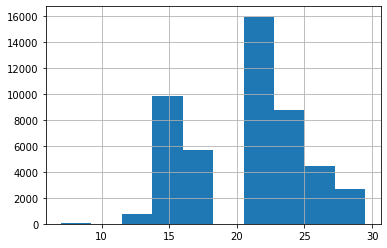

In [41]:
df['Tire_Size'].hist()

In [42]:
##
# print tire sizes
np.sort(df['Tire_Size'].unique())

array([ 7. , 10. , 13. , 14. , 15.5, 17.5, 20.5, 23.1, 23.5, 26.5, 29.5,
        nan])

The plot does not show any outliers, and we can apply our missing values fix on this feature.

In [43]:
fix_missing_num(df, 'Tire_Size')

#### Stick_Length

The Next numerical feature is 'Stick_Lenght'. Let's plot the distribution to check for any outliers.

In [44]:
np.sort(df['Stick_Length'].unique())

array([ 6.3,  7.1,  8.1,  8.2,  8.4,  8.6,  9.1,  9.2,  9.5,  9.6,  9.7,
        9.8, 10.1, 10.2, 10.6, 11. , 11.1, 12.1, 12.4, 12.8, 13.1, 13.7,
       13.9, 14.1, 15.4, 15.9, 19.8, 24.3,  nan])

<AxesSubplot:ylabel='Frequency'>

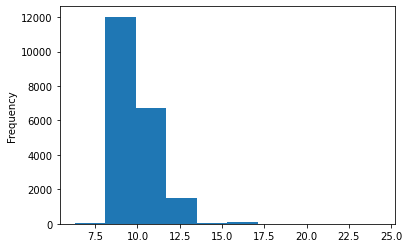

In [45]:
df['Stick_Length'].plot.hist()

The above plot shows a normal distribution and no outliers. So we can apply our missing values fix on this feature.

In [46]:
fix_missing_num(df, 'Stick_Length')

#### Undercarriage_Pad_Width

Next numerical feature is 'Undercarriage_Pad_Width'. Let's follow the same steps for this feature. 

In [47]:
np.sort(df['Undercarriage_Pad_Width'].unique())

array([14. , 15. , 16. , 18. , 20. , 22. , 24. , 25. , 26. , 27. , 28. ,
       30. , 31. , 31.5, 32. , 33. , 34. , 36. ,  nan])

<AxesSubplot:ylabel='Frequency'>

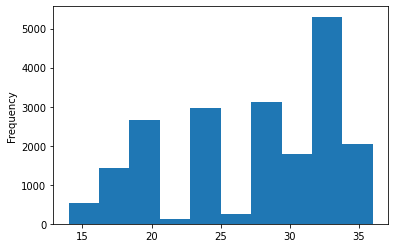

In [48]:
df['Undercarriage_Pad_Width'].plot.hist()

The distribution for this feature looks fine, and we can apply missing values fix on it.

In [49]:
fix_missing_num(df, 'Undercarriage_Pad_Width')

#### Blade_Width

Next numerical feature in 'Blade_Width'. Following the same steps as above.

In [50]:
np.sort(df['Blade_Width'].unique())

array([12., 13., 14., 16., nan])

<AxesSubplot:ylabel='Frequency'>

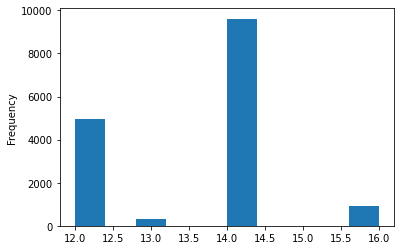

In [51]:
df['Blade_Width'].plot.hist()

Apply the fix on this feature.

In [52]:
fix_missing_num(df, 'Blade_Width')

### Replace missing categorical values



We will now replace missing values for categorical features in the following way.
* We will label encode them. We will treat them as ordinal features and assign them a numeric value
* Missing values will automatically be a value, and that will be 0

Some important discussion points on treating nominal categorical features as ordinal and then encoding them. A more prevalent approach is to one hot encode (OHE) them. The drawback of OHE approach is that it makes the decision trees very unbalanced if the dataset has multiple categorical features and high variance among them. OHE works better for linear models. In practice encoding categorical features as ordinal have given similar or better results.

More can be read about categorical features encoding from these references
* [The Mechanics of Machine Learning](https://mlbook.explained.ai/catvars.html#sec:catvars) by Terence Parr and Jeremy Howard section 6.2
* [Getting Deeper into Categorical Encodings for Machine Learning](https://towardsdatascience.com/getting-deeper-into-categorical-encodings-for-machine-learning-2312acd347c8)
* [One-Hot Encoding is making your Tree-Based Ensembles worse, here’s why?](https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769)

We will first label encode our categorical features and check their importance. If a feature shows high importance and has limited values then we will consider using OHE on it otherwise we will leave it with label encoding.

Let's create functions to encode our categorical features.

In [53]:
from pandas.api.types import is_categorical_dtype, is_string_dtype

def df_string_to_cat(df):
    for col in df.columns:
        if is_string_dtype(df[col]):
            print(col)
            df[col] = df[col].astype('category').cat.as_ordered()

def df_cat_to_catcode(df):
    for col in df.columns:
        if is_categorical_dtype(df[col]):
            df[col] = df[col].cat.codes + 1

Please note that Pandas represents np.nan with category code -1 and so adding one shifts np.nan to 0 and all category codes to be 1 and above.

In [54]:
##
# before transformation
df.head(5).T.head(10)

,0,1,2,3,4
SalePrice,66000,57000,10000,38500,11000
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004.0,1996.0,2001.0,2001.0,2007.0
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,low,low,high,high,medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00
fiModelDesc,521d,950fii,226,pc120-6e,s175
fiBaseModel,521,950,226,pc120,s175


In [55]:
#collapse-output
# apply the cat transformation
df_string_to_cat(df)
df_cat_to_catcode(df)

auctioneerID
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [56]:
##
# after transformation
df.head(5).T.head(10)

,0,1,2,3,4
SalePrice,66000,57000,10000,38500,11000
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,23,23,23,23,23
YearMade,2004.0,1996.0,2001.0,2001.0,2007.0
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,2,2,1,1,3
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00
fiModelDesc,950,1725,331,3674,4208
fiBaseModel,296,527,110,1375,1529


## Preprocessed dataset

At this point, all our numerical and categorical features have been preprocessed. There should be no missing values, and all categorical features should have been encoded. Only DateTime columns are remaining to be processed and we will do that in the next section. 

Let's verify the data using summary information.

In [57]:
df_info = pd.DataFrame()
df_info['sample'] = df.iloc[0]
df_info['data_type'] = df.dtypes
df_info['percent_missing'] = 100*df.isnull().sum() / len(df)
df_info.sort_values('percent_missing')

,sample,data_type,percent_missing
SalePrice,66000,int64,0.0
Pushblock,0,int8,0.0
Ripper,0,int8,0.0
Scarifier,0,int8,0.0
Tip_Control,0,int8,0.0
Tire_Size,20.5,float64,0.0
Coupler,0,int8,0.0
Coupler_System,0,int8,0.0
Grouser_Tracks,0,int8,0.0
Hydraulics_Flow,0,int8,0.0


Let's retrain our base model one more time but this time with all the features except datetime columns to see where we stand in our OOB score.

In [58]:
def train_and_plot_model(df, target='SalePrice', drop_features=[], n_estimators=50, verbose=1):
    """
    A utility function to train a RandomForrest model on the provided data, and plot the feature importances.
    
    Parameters
    ----------
    df: pandas.DataFrame
        input dataset to be used for training
    target: str
        target feature. this is the feature we are trying to predict
    drop_features: list
        any features to be dropped before training. Default is empty list.
    n_estimators: int
        number of estimators to be used for model training. Default is 50.
    """

    # target = 'SalePrice' # this is the feature we are trying to predict
    features = list(df.columns)

    # remove target feature and other specified features form the input variables
    features.remove(target)
    for f in drop_features:
        features.remove(f)

    X, y = df[features], df[target]

    rf = RandomForestRegressor(n_estimators, oob_score=True, n_jobs=-1, verbose=verbose)
    rf.fit(X, y)
    oob_score = rf.oob_score_

    # get trained model leaves and depth    
    n_leaves = rf_n_leaves(rf)
    m_depth = rf_m_depth(rf)

    # print trained model info
    print(f"OOB scrore = {oob_score: .3f} \nTree leaves = {n_leaves: ,d} \nMedian depth = {m_depth}")

    # plot trained model feature importance
    feature_importance = rf.feature_importances_
    plot_feature_importance(feature_importance, features, (10,15))
    
    # return trained model, feature names, and their importances
    return (rf, features, feature_importance, oob_score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.4min finished


OOB scrore =  0.902 
Tree leaves =  10,471,913 
Median depth = 46.0


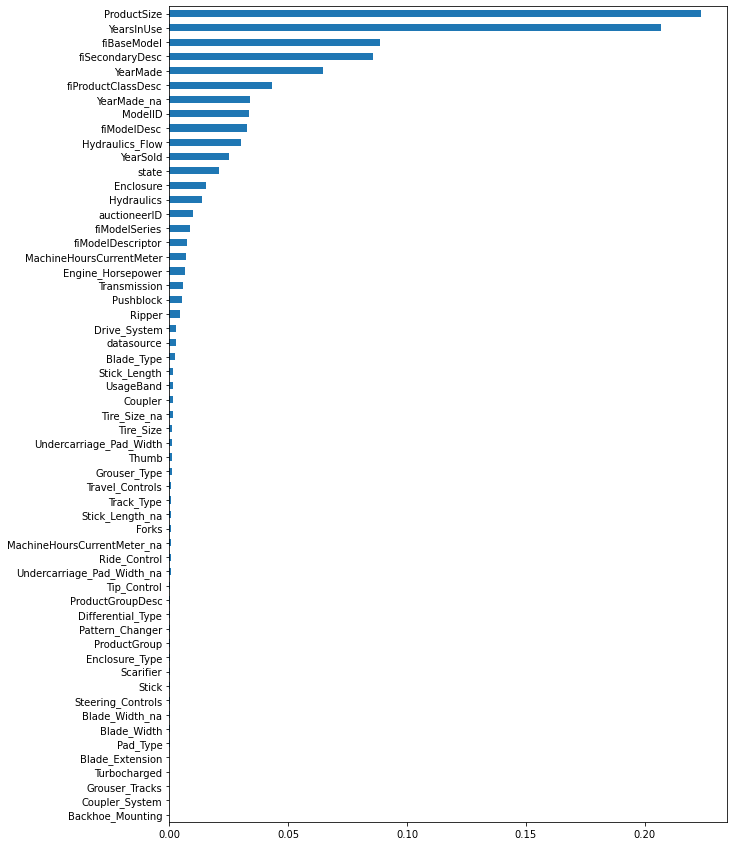

In [59]:
#collapse-output
(rf, feature_names, feature_importance, oob_pre) = train_and_plot_model(df, drop_features=['saledate'])

This is a big improvement in our model performance. At this point, our features have correct data types and their missing values are properly adjusted. We can now focus on some feature engineering aspects. Before moving further let's also save our dataset till this point so if we make an error we can restart from this point.

In [60]:
##
# store preprocessed data as a check point for this state
df.to_pickle(dataset_path+'preprocessed.pkl')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


OOB scrore =  0.902 
Tree leaves =  10,470,636 
Median depth = 46.0


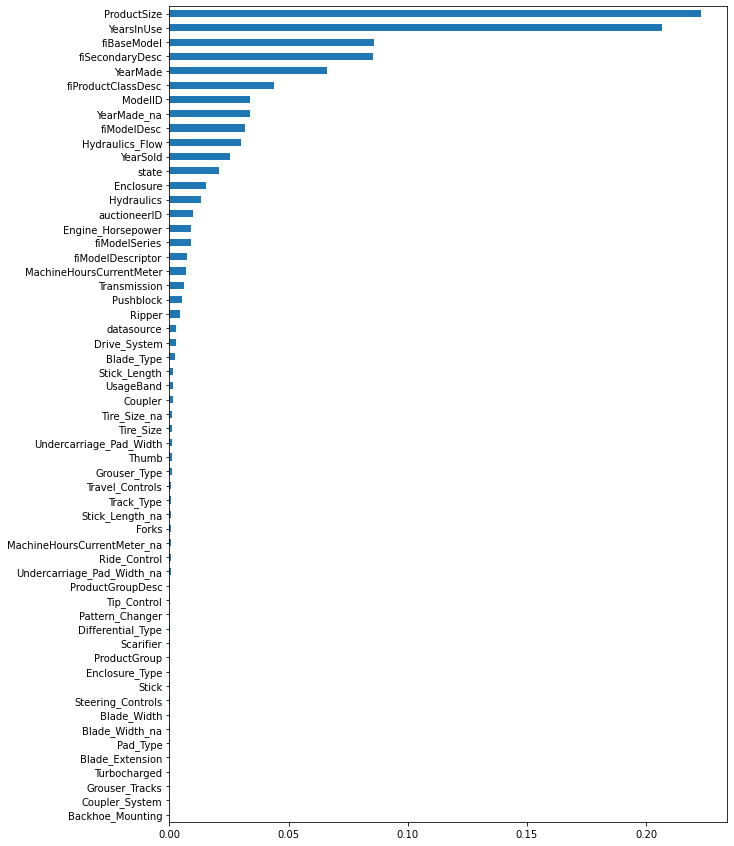

In [61]:
##
# load preprocessed data
df = pd.read_pickle(dataset_path+'preprocessed.pkl')
# (rf, feature_names, feature_importance, pre_score) = train_and_plot_model(df, drop_features=['saledate'])

## Feature Engineering

For feature engineering we will give priority to important features. For this let us again analyse the preprocessed dataset starting from important features to see what can be done against each feature.

In [62]:
##
# sort the dataframe with important features at the start
temp = pd.Series(feature_importance, feature_names)
cols = temp.nlargest(len(temp)).index

sniff(df[cols], 10)

,ProductSize,YearsInUse,fiBaseModel,fiSecondaryDesc,YearMade,fiProductClassDesc,ModelID,YearMade_na,fiModelDesc,Hydraulics_Flow,YearSold,state,Enclosure,Hydraulics,auctioneerID,Engine_Horsepower,fiModelSeries,fiModelDescriptor,MachineHoursCurrentMeter,Transmission,Pushblock,Ripper,datasource,Drive_System,Blade_Type,Stick_Length,UsageBand,Coupler,Tire_Size_na,Tire_Size,Undercarriage_Pad_Width,Thumb,Grouser_Type,Travel_Controls,Track_Type,Stick_Length_na,Forks,MachineHoursCurrentMeter_na,Ride_Control,Undercarriage_Pad_Width_na,ProductGroupDesc,Tip_Control,Pattern_Changer,Differential_Type,Scarifier,ProductGroup,Enclosure_Type,Stick,Steering_Controls,Blade_Width,Blade_Width_na,Pad_Type,Blade_Extension,Turbocharged,Grouser_Tracks,Coupler_System,Backhoe_Mounting
0,0,2.0,296,40,2004.0,59,3157,False,950,0,2006,1,3,1,23,0,0,0,68.0,0,0,0,121,0,0,9.7,2,0,True,20.5,28.0,0,0,0,0,True,0,False,0,True,6,0,0,4,0,6,0,0,2,14.0,True,0,0,0,0,0,0
1,4,8.0,527,54,1996.0,62,77,True,1725,2,2004,33,5,4,2,1,97,65,4640.0,5,1,3,132,2,5,11.0,1,2,False,23.5,16.0,1,1,3,2,False,1,True,1,False,3,1,2,0,1,3,2,1,0,12.0,False,2,1,1,1,1,1
2,6.0,3.0,110.0,0.0,2001.0,39.0,7009.0,NaN,331.0,1.0,2011.0,32.0,1.0,0.0,13.0,2.0,44.0,20.0,2838.0,6.0,NaN,2.0,136.0,4.0,6.0,15.9,3.0,1.0,NaN,13.0,32.0,2.0,3.0,5.0,1.0,NaN,NaN,NaN,2.0,NaN,4.0,2.0,1.0,1.0,NaN,4.0,1.0,2.0,1.0,13.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3,3.0,10.0,1375.0,56.0,2007.0,8.0,332.0,NaN,3674.0,NaN,2009.0,44.0,0.0,11.0,4.0,NaN,102.0,64.0,3486.0,4.0,NaN,1.0,149.0,3.0,9.0,10.2,0.0,NaN,NaN,26.5,30.0,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,3.0,16.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,5.0,4.0,1529.0,47.0,1993.0,40.0,17311.0,NaN,4208.0,NaN,2008.0,3.0,2.0,5.0,24.0,NaN,33.0,83.0,722.0,3.0,NaN,NaN,172.0,1.0,7.0,10.6,NaN,NaN,NaN,29.5,22.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,2.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,11.0,175.0,61.0,2008.0,2.0,4605.0,NaN,493.0,NaN,2005.0,9.0,4.0,7.0,27.0,NaN,98.0,33.0,508.0,1.0,NaN,NaN,NaN,NaN,1.0,9.1,NaN,NaN,NaN,14.0,24.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,1.0,419.0,20.0,1998.0,14.0,1937.0,NaN,1453.0,NaN,2007.0,13.0,NaN,3.0,30.0,NaN,2.0,100.0,11540.0,2.0,NaN,NaN,NaN,NaN,4.0,10.1,NaN,NaN,NaN,17.5,18.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,7.0,243.0,105.0,1999.0,17.0,3539.0,NaN,740.0,NaN,2010.0,37.0,NaN,2.0,26.0,NaN,73.0,128.0,4883.0,NaN,NaN,NaN,NaN,NaN,8.0,9.6,NaN,NaN,NaN,15.5,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,5.0,250.0,133.0,2003.0,68.0,36003.0,NaN,779.0,NaN,2000.0,35.0,NaN,6.0,25.0,NaN,13.0,71.0,302.0,NaN,NaN,NaN,NaN,NaN,3.0,12.8,NaN,NaN,NaN,7.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,14.0,540.0,129.0,1991.0,51.0,3883.0,NaN,1771.0,NaN,2002.0,4.0,NaN,8.0,11.0,NaN,54.0,122.0,20700.0,NaN,NaN,NaN,NaN,NaN,2.0,8.2,NaN,NaN,NaN,10.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* `Hydraulics_Flow` and `Enclosure` are categorical variables. During preprocessing we have label encoded them. On feature importance plot they are coming up as important features, and they also have low variance (less than 10 distinct values). So we can consider them for One Hot Encoding (OHE). There are other features that also fall in the same category but don't have much importance like `Transmission`, `Stick`, `Pad_Type` etc.

### One Hot Encode Hydralics_Flow


Let's check unique values for `Hydraulics_Flow`.

In [63]:
df['Hydraulics_Flow'].value_counts()

0    357788
2     42784
1       553
Name: Hydraulics_Flow, dtype: int64

We have label encode this feature in the last section. Although we could still use this encoded feature for one hot encoding but it is better if we use original labels for OHE. Reason is that we would like our dummy columns generated from OHE to be propery named with label so they are easier to follow and understand. Using encoded dummy column names makes them difficult to follow. let's use the original dataframe to check the unique values.

In [64]:
df_raw['Hydraulics_Flow'].value_counts(dropna=False)

NaN                    357763
Standard                42784
High Flow                 553
None or Unspecified        25
Name: Hydraulics_Flow, dtype: int64

Before applying OHE we need to preprocess 'None or Unspecified' as they repsent the same as `np.nan`. So Let's do that.  

In [65]:
## 
# get the original values
df['Hydraulics_Flow'] = df_raw['Hydraulics_Flow']
df['Hydraulics_Flow'] = df['Hydraulics_Flow'].replace('None or Unspecified', np.nan)

df['Hydraulics_Flow'].value_counts(dropna=False)

NaN          357788
Standard      42784
High Flow       553
Name: Hydraulics_Flow, dtype: int64

At this point `Hydraulics_Flow` value count is same as was with encoded labels. There is no difference between them instead we now have proper labels in the data. Let's check the first few rows of this column.

In [66]:
df['Hydraulics_Flow'].head()

0         NaN
1         NaN
2    Standard
3         NaN
4    Standard
Name: Hydraulics_Flow, dtype: object

Notice that in the first five rows there are `Standard` values at row index 2 and 4, and the remaining are `NaN` values. We will OHE them in the next step and compare the results to ensure encoding is properly working.

In [67]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
onehot_output = onehot_encoder.fit_transform(df[['Hydraulics_Flow']])

# check the output
print(onehot_output[:5].toarray())

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


These are same five rows but this time encoded with one-hot values. From the position of '1' appearing in different columns we can deduce that first column is for label `High Flow` and second is for `Standard` and third is for `NaN`. It would be easier for us to track these dummy columns if we have proper names on them. So let's do that.

We can get the dummy column names by calling `get_feature_names_out()` on our encoder.

In [68]:
# name of the columns
onehot_encoder.get_feature_names_out()

array(['Hydraulics_Flow_High Flow', 'Hydraulics_Flow_Standard',
       'Hydraulics_Flow_nan'], dtype=object)

Let's create a dataframe of these dummy variables.

In [69]:
df_onehot = pd.DataFrame(onehot_output.toarray(), columns=onehot_encoder.get_feature_names_out())
df_onehot.head()

,Hydraulics_Flow_High Flow,Hydraulics_Flow_Standard,Hydraulics_Flow_nan
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


At this point `Hydraulics_Flow` is OHE so we can drop the original column from the dataframe and add these encoded columns.

In [70]:
del df['Hydraulics_Flow']

df = pd.concat([df, df_onehot], axis=1) # concat dataframes column wise
df.head()

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,YearMade_na,YearSold,YearsInUse,MachineHoursCurrentMeter_na,Tire_Size_na,Stick_Length_na,Undercarriage_Pad_Width_na,Blade_Width_na,Hydraulics_Flow_High Flow,Hydraulics_Flow_Standard,Hydraulics_Flow_nan
0,66000,3157,121,23,2004.0,68.0,2,2006-11-16,950,296,40,0,0,0,59,1,6,6,0,3,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2006,2.0,False,True,True,True,True,0.0,0.0,1.0
1,57000,77,121,23,1996.0,4640.0,2,2004-03-26,1725,527,54,97,0,4,62,33,6,6,0,3,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,23.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2004,8.0,False,False,True,True,True,0.0,0.0,1.0
2,10000,7009,121,23,2001.0,2838.0,1,2004-02-26,331,110,0,0,0,0,39,32,3,3,0,5,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2004,3.0,False,True,True,True,True,0.0,1.0,0.0
3,38500,332,121,23,2001.0,3486.0,1,2011-05-19,3674,1375,0,44,0,6,8,44,4,4,0,3,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2011,10.0,False,True,True,True,True,0.0,0.0,1.0
4,11000,17311,121,23,2007.0,722.0,3,2009-07-23,4208,1529,0,0,0,0,40,32,3,3,0,1,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2009,2.0,False,True,True,True,True,0.0,1.0,0.0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


OOB scrore =  0.902 
Tree leaves =  10,471,062 
Median depth = 45.0


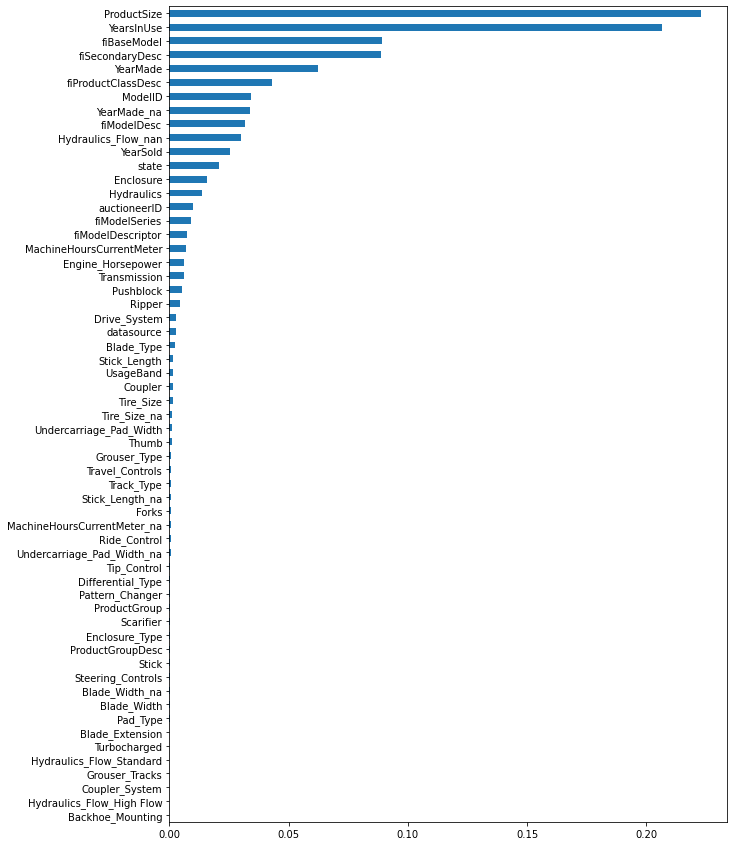

In [71]:
#collapse-output
(rf, feature_names, feature_importance, oob_hydralics) = train_and_plot_model(df, drop_features=['saledate'])

### One Hot Encode Enclosure

Next feature to OHE is `Enclosure`, and we will use the same steps we followed for 'Hydralics_Flow'.

In [72]:
##
# check value counts
df_raw['Enclosure'].value_counts(dropna=False)

OROPS                  173932
EROPS                  139026
EROPS w AC              87820
NaN                       325
EROPS AC                   17
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64

Here **ROPS** is an abbrivation for **Roll Over Protection System** and there are mutiple variants of the same standard
* OROPS = Open ROPS
* EROPS = Enclosed ROPS
* EROPS AC = Enclosed ROPS with Air Conditioning
* EROPS w AC = Enclosed ROPS with Air Conditioning. Same as 'EROPS AC'
* NO ROPS = No ROPS. Same as 'NaN' or 'None or Unspecified'

You can read more about ROPS standard here
* http://www.miningrops.com.au/ropsintro.html
* https://www.youtube.com/watch?v=LZ40O1My8E4&ab_channel=MissouriEarthMovers

Using this information we can also preprocess this feature to make it's values more consistant.

In [73]:
## 
# get the original values
df['Enclosure'] = df_raw['Enclosure']

# change 'None or Unspecified' and 'NO ROPS' to np.nan
df['Enclosure'] = df['Enclosure'].replace('None or Unspecified', np.nan)
df['Enclosure'] = df['Enclosure'].replace('NO ROPS', np.nan)

# change 'EROPS w AC' to 'EROPS AC'
df['Enclosure'] = df['Enclosure'].replace('EROPS w AC', 'EROPS AC')

df['Enclosure'].value_counts(dropna=False)

OROPS       173932
EROPS       139026
EROPS AC     87837
NaN            330
Name: Enclosure, dtype: int64

In [74]:
df.head()

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,YearMade_na,YearSold,YearsInUse,MachineHoursCurrentMeter_na,Tire_Size_na,Stick_Length_na,Undercarriage_Pad_Width_na,Blade_Width_na,Hydraulics_Flow_High Flow,Hydraulics_Flow_Standard,Hydraulics_Flow_nan
0,66000,3157,121,23,2004.0,68.0,2,2006-11-16,950,296,40,0,0,0,59,1,6,6,0,EROPS AC,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2006,2.0,False,True,True,True,True,0.0,0.0,1.0
1,57000,77,121,23,1996.0,4640.0,2,2004-03-26,1725,527,54,97,0,4,62,33,6,6,0,EROPS AC,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,23.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2004,8.0,False,False,True,True,True,0.0,0.0,1.0
2,10000,7009,121,23,2001.0,2838.0,1,2004-02-26,331,110,0,0,0,0,39,32,3,3,0,OROPS,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2004,3.0,False,True,True,True,True,0.0,1.0,0.0
3,38500,332,121,23,2001.0,3486.0,1,2011-05-19,3674,1375,0,44,0,6,8,44,4,4,0,EROPS AC,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2011,10.0,False,True,True,True,True,0.0,0.0,1.0
4,11000,17311,121,23,2007.0,722.0,3,2009-07-23,4208,1529,0,0,0,0,40,32,3,3,0,EROPS,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2009,2.0,False,True,True,True,True,0.0,1.0,0.0


In [75]:
##
# one hot encode 'Enclosure'
onehot_encoder = OneHotEncoder()
onehot_output = onehot_encoder.fit_transform(df[['Enclosure']])

df_onehot = pd.DataFrame(onehot_output.toarray(), columns=onehot_encoder.get_feature_names_out())
df_onehot.head()

,Enclosure_EROPS,Enclosure_EROPS AC,Enclosure_OROPS,Enclosure_nan
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [76]:
##
# drop original column
del df['Enclosure']

# add dummy columns to the dataframe
df = pd.concat([df, df_onehot], axis=1) # concat dataframes column wise
df.head()

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,YearMade_na,YearSold,YearsInUse,MachineHoursCurrentMeter_na,Tire_Size_na,Stick_Length_na,Undercarriage_Pad_Width_na,Blade_Width_na,Hydraulics_Flow_High Flow,Hydraulics_Flow_Standard,Hydraulics_Flow_nan,Enclosure_EROPS,Enclosure_EROPS AC,Enclosure_OROPS,Enclosure_nan
0,66000,3157,121,23,2004.0,68.0,2,2006-11-16,950,296,40,0,0,0,59,1,6,6,0,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2006,2.0,False,True,True,True,True,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,57000,77,121,23,1996.0,4640.0,2,2004-03-26,1725,527,54,97,0,4,62,33,6,6,0,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,23.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2004,8.0,False,False,True,True,True,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,10000,7009,121,23,2001.0,2838.0,1,2004-02-26,331,110,0,0,0,0,39,32,3,3,0,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2004,3.0,False,True,True,True,True,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,38500,332,121,23,2001.0,3486.0,1,2011-05-19,3674,1375,0,44,0,6,8,44,4,4,0,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2011,10.0,False,True,True,True,True,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,11000,17311,121,23,2007.0,722.0,3,2009-07-23,4208,1529,0,0,0,0,40,32,3,3,0,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2009,2.0,False,True,True,True,True,0.0,1.0,0.0,1.0,0.0,0.0,0.0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.7min finished


OOB scrore =  0.901 
Tree leaves =  10,485,589 
Median depth = 45.0


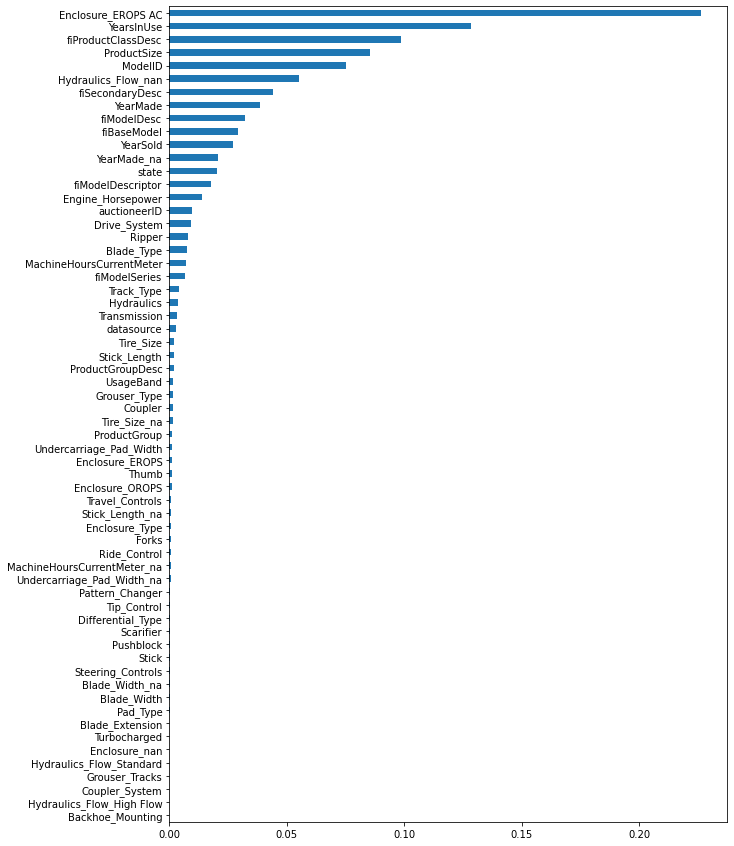

In [77]:
#collapse-output
(rf, feature_names, feature_importance, oob_enclosure) = train_and_plot_model(df, drop_features=['saledate'])

## Create date related features

we have already included yearsold feature. we can include more consiquent featuresd from saledate.

In [78]:
df["salemonth"] = df['saledate'].dt.month
df["saleday"] = df['saledate'].dt.day
df["saledayofweek"] = df['saledate'].dt.dayofweek
df["saledayofyear"] = df['saledate'].dt.dayofyear

del df['saledate']

In [79]:
df.head()

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,YearMade_na,YearSold,YearsInUse,MachineHoursCurrentMeter_na,Tire_Size_na,Stick_Length_na,Undercarriage_Pad_Width_na,Blade_Width_na,Hydraulics_Flow_High Flow,Hydraulics_Flow_Standard,Hydraulics_Flow_nan,Enclosure_EROPS,Enclosure_EROPS AC,Enclosure_OROPS,Enclosure_nan,salemonth,saleday,saledayofweek,saledayofyear
0,66000,3157,121,23,2004.0,68.0,2,950,296,40,0,0,0,59,1,6,6,0,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2006,2.0,False,True,True,True,True,0.0,0.0,1.0,0.0,1.0,0.0,0.0,11,16,3,320
1,57000,77,121,23,1996.0,4640.0,2,1725,527,54,97,0,4,62,33,6,6,0,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,23.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2004,8.0,False,False,True,True,True,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3,26,4,86
2,10000,7009,121,23,2001.0,2838.0,1,331,110,0,0,0,0,39,32,3,3,0,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2004,3.0,False,True,True,True,True,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,26,3,57
3,38500,332,121,23,2001.0,3486.0,1,3674,1375,0,44,0,6,8,44,4,4,0,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2011,10.0,False,True,True,True,True,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5,19,3,139
4,11000,17311,121,23,2007.0,722.0,3,4208,1529,0,0,0,0,40,32,3,3,0,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2009,2.0,False,True,True,True,True,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7,23,3,204


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.2min finished


OOB scrore =  0.906 
Tree leaves =  10,363,190 
Median depth = 45.0


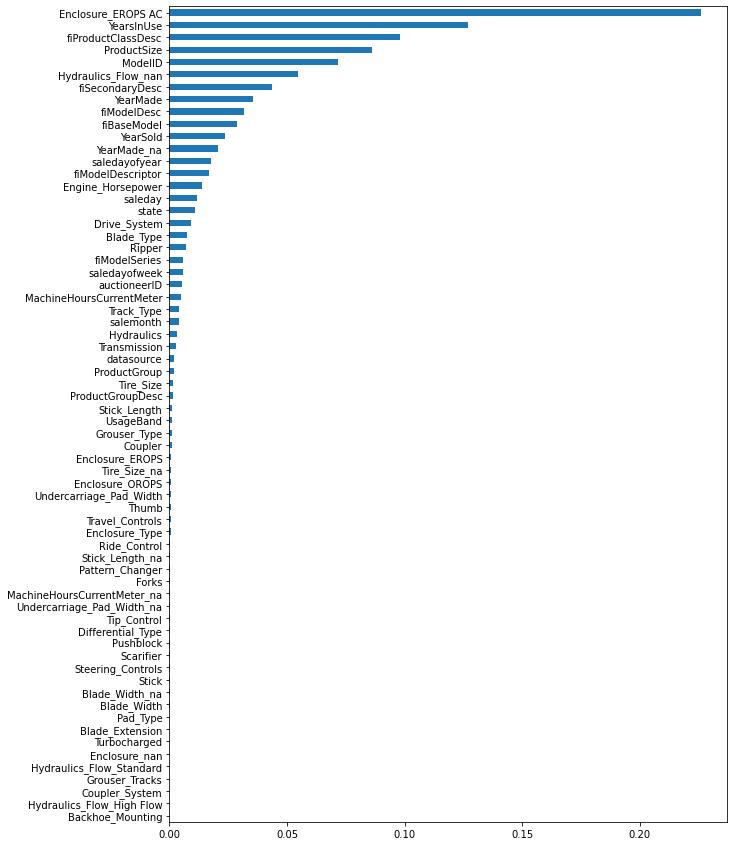

In [80]:
#collapse-output
(rf, feature_names, feature_importance, oob_date) = train_and_plot_model(df)

### fiProductClassDesc

In [85]:
df_raw['fiProductClassDesc'].head()

0             Wheel Loader - 110.0 to 120.0 Horsepower
1             Wheel Loader - 150.0 to 175.0 Horsepower
2    Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...
3    Hydraulic Excavator, Track - 12.0 to 14.0 Metr...
4    Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...
Name: fiProductClassDesc, dtype: object

In [87]:
df_split = df_raw.fiProductClassDesc.str.split(' - ',expand=True).values

In [95]:
df_split[:,1]

array(['110.0 to 120.0 Horsepower', '150.0 to 175.0 Horsepower',
       '1351.0 to 1601.0 Lb Operating Capacity', ...,
       '3.0 to 4.0 Metric Tons', '2.0 to 3.0 Metric Tons',
       '2.0 to 3.0 Metric Tons'], dtype=object)

In [96]:
df['fiProductClassDesc'] = df_split[:,0] 
df['fiProductClassSpec'] = df_split[:,1]

In [97]:
pattern = r'([0-9.\+]*)(?: to ([0-9.\+]*)|\+) ([a-zA-Z ]*)'
df_split = df['fiProductClassSpec'].str.extract(pattern, expand=True).values
df['fiProductClassSpec_lower'] = pd.to_numeric(df_split[:,0])
df['fiProductClassSpec_upper'] = pd.to_numeric(df_split[:,1])
df['fiProductClassSpec_units'] = df_split[:,2]
del df['fiProductClassSpec'] # remove temporary colum

In [98]:
df.filter(regex=('fiProductClassSpec*')).head()

,fiProductClassSpec_lower,fiProductClassSpec_upper,fiProductClassSpec_units
0,110.0,120.0,Horsepower
1,150.0,175.0,Horsepower
2,1351.0,1601.0,Lb Operating Capacity
3,12.0,14.0,Metric Tons
4,1601.0,1751.0,Lb Operating Capacity


In [99]:
fix_missing_num(df, 'fiProductClassSpec_lower')
fix_missing_num(df, 'fiProductClassSpec_upper')
# label encode fiProductClassDesc fiProductClassSpec_units
df_string_to_cat(df)
df_cat_to_catcode(df)

fiProductClassDesc
fiProductClassSpec_units


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


OOB scrore =  0.906 
Tree leaves =  10,352,685 
Median depth = 46.0


(RandomForestRegressor(n_estimators=50, n_jobs=-1, oob_score=True, verbose=1),
 ['ModelID',
  'datasource',
  'auctioneerID',
  'YearMade',
  'MachineHoursCurrentMeter',
  'UsageBand',
  'fiModelDesc',
  'fiBaseModel',
  'fiSecondaryDesc',
  'fiModelSeries',
  'fiModelDescriptor',
  'ProductSize',
  'fiProductClassDesc',
  'state',
  'ProductGroup',
  'ProductGroupDesc',
  'Drive_System',
  'Forks',
  'Pad_Type',
  'Ride_Control',
  'Stick',
  'Transmission',
  'Turbocharged',
  'Blade_Extension',
  'Blade_Width',
  'Enclosure_Type',
  'Engine_Horsepower',
  'Hydraulics',
  'Pushblock',
  'Ripper',
  'Scarifier',
  'Tip_Control',
  'Tire_Size',
  'Coupler',
  'Coupler_System',
  'Grouser_Tracks',
  'Track_Type',
  'Undercarriage_Pad_Width',
  'Stick_Length',
  'Thumb',
  'Pattern_Changer',
  'Grouser_Type',
  'Backhoe_Mounting',
  'Blade_Type',
  'Travel_Controls',
  'Differential_Type',
  'Steering_Controls',
  'YearMade_na',
  'YearSold',
  'YearsInUse',
  'MachineHoursCurrentMeter_n

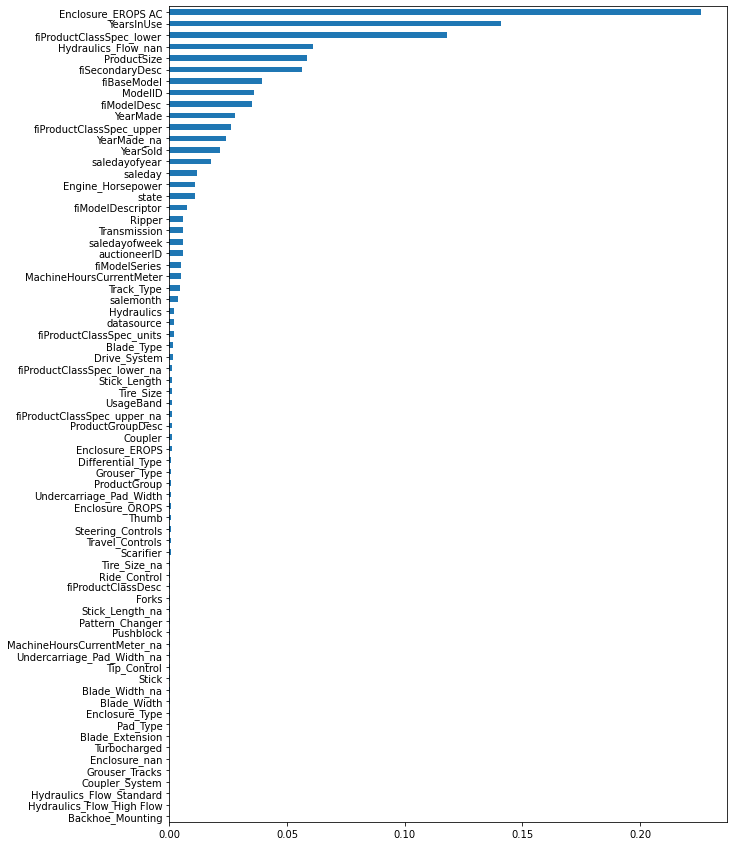

In [100]:
train_and_plot_model(df)